# Declaring target feature

In [1]:
target_features = ['GrainYield']
# target_features = ['Days2Maturity']

# Importing Libraries

In [2]:
import os
import csv
import numpy as np
import pandas as pd
from copy import copy
from datetime import datetime as dt

# Dictionaries
import json
from pprint import pprint

# Iterate in loops
import itertools
from itertools import zip_longest

# Simpsons integration
from numpy import trapz
from scipy.integrate import simps

# Visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# To display df nicely in loops
from IPython.display import display 
# Display rows and columns Pandas
pd.options.display.max_columns = 100
pd.set_option('display.max_rows',100)

# # For displaying max rows in series
# pd.options.display.max_rows = 10

# Importing data

In [3]:
# Prints the current working directory
os.getcwd()
# os.listdir()

'C:\\Users\\fahad\\MegaSync\\NMBU\\GitHub\\vPheno'

## Finding Username folder to make general path for multi PC use

In [4]:
username = str(os.getcwd()).split('\\')[2]
user_path = r'C:/Users/'+username+'/'
username, user_path

('fahad', 'C:/Users/fahad/')

## Declaring Import paths

In [5]:
main_path = r'./Data/'
# path = user_path+r'/MegaSync\NMBU\Master Thesis\WRITING\RESULTS\Final/'
# export_path = user_path+r'/MegaSync\NMBU\Master Thesis\WRITING\RESULTS\Final_clean/'
# plot_path = user_path+r'/MegaSync\NMBU\Master Thesis\WRITING\RESULTS\Final_plot/'


path = user_path+r'\MegaSync\NMBU\Master Thesis\WRITING\RESULTS\Reslts all feat\ALL DATA/'
export_path = user_path+r'\MegaSync\NMBU\Master Thesis\WRITING\RESULTS\Reslts all feat\ALL DATA/filtered/'
plot_path = user_path+r'\MegaSync\NMBU\Master Thesis\WRITING\RESULTS\Reslts all feat\ALL DATA/plots/'

    
    
# Create export_path folder if not exists already
os.makedirs(path, exist_ok=True)
os.makedirs(export_path, exist_ok=True)
os.makedirs(plot_path, exist_ok=True)

os.listdir(path)

['DM_Simps',
 'DM_Trapz',
 'filtered',
 'GY_Simps',
 'GY_Trapz',
 'plots',
 'results_DM_all_data.xlsx',
 'results_GY_all_data.xlsx']

In [6]:
# Making dictionary of files in each folder, in case there are multiple types of data
dict_paths = {}
def explore(starting_path):
    for dirpath, dirnames, filenames in os.walk(starting_path):
        dict_paths[dirpath.split('/')[-2]] = filenames
#     pprint(dict_paths)
explore(path)

# Data Preparation
## Creating list of complete files

In [7]:
# Get the list of all files in directory tree at given path

files_with_address = []
files_list = []

for (dirpath, dirnames, filenames) in os.walk(path):
    files_with_address += [os.path.join(dirpath, file) for file in filenames]
    files_list.extend(filenames)
print(len(files_with_address), 'files found in the directory')

532 files found in the directory


# Importing data files to Pandas

In [8]:
all_df = []
for data in files_with_address:
    file_name = os.path.splitext(os.path.basename(data))[0]
    file_ext = os.path.splitext(os.path.basename(data))[1]
    if file_ext == '.csv' or file_ext == '.xlsx':
        # Replce all invalid characters in the name
        file_name = file_name.replace(" ", "_")
        file_name = file_name.replace("-", "_")
        file_name = file_name.replace(")", "")
        file_name = file_name.replace("(", "")
        df_name = file_name.replace(".", "")
        # Test: Check if the same date is already present in the current dict key
        if df_name in all_df:
            print(f'A file with the same name {df_name} has already been imported. \n Please check if there is duplication of data.')
            raise NameError
        all_df.append(df_name)

        locals()[df_name] = pd.read_excel(data, engine='openpyxl')
        print(df_name, '=====', locals()[df_name].shape)
all_df

results_DM_all_data ===== (350, 12)
results_GY_all_data ===== (560, 12)
plot_df_DM_ ===== (14, 22)
plot_df_GY_ ===== (14, 22)


BadZipFile: File is not a zip file

# Exporting Results

In [ ]:
# target = '_GY_'
# res_df = results_GY_all_data[['Model','Aggregation_method',
#                         'Train_field', 'Test_field', 
#                         'Training_features', 
#                         'RMSE_test', 'RMSE_train',
#                         'R2_test', 'R2_train']]


target = '_DM_'
res_df = results_DM_all_data[['Model','Aggregation_method',
                        'Train_field', 'Test_field', 
                        'Training_features', 
                        'RMSE_test', 'RMSE_train',
                        'R2_test', 'R2_train']]
res_df.Model.unique()
res_df.columns

## Scores all_mix

In [ ]:
scores = ['R2_test', 'RMSE_test', 'R2_train', 'RMSE_train']

In [ ]:
for agg_method in ['Simpsons', 'Trapezoid']:
    temp_export_df = pd.DataFrame()
    for score in scores:
        # Collecting Simps results
        counter = 1
        for model in res_df.Model.unique():
            temp_df = res_df[(res_df['Model']==model) &
                                 (res_df['Aggregation_method']==agg_method) &
                             (res_df['Model']!='Lasso(random_state=1)') &
                             (res_df['Train_field']=='all_mix')]
            temp_df = temp_df[['Model','Aggregation_method',
                        'Train_field', 'Test_field', 
                        'Training_features', 
                        'RMSE_test', 'R2_test',
                        'RMSE_train', 'R2_train']]
            feat_list = temp_df.Training_features.reset_index(drop=True)

        #     temp_export_df[model.split('(')[0]+str(counter)] = temp_df.R2_test.reset_index(drop=True)
            temp_export_df[model+'#'+score] = temp_df[score].reset_index(drop=True)
        if counter == 1:
            temp_export_df['Features'] = feat_list
            if agg_method == 'Simpsons':
                temp_export_df['Agg_method'] = 'Simpson_all_fields data'
            elif agg_method == 'Trapezoid':
                temp_export_df['Agg_method'] = 'Trapezoidal_all_fields data'
        else:
            assert temp_export_df['Features'] == feat_list
            if agg_method == 'Simpsons':
                assert temp_export_df['Agg_method'] == 'Simpson_all_fields data'
            elif agg_method == 'Trapezoid':
                assert temp_export_df['Agg_method'] == 'Trapezoidal_all_fields data'
                
        temp_export_df = temp_export_df.reindex(sorted(temp_export_df.columns), axis=1)
    # Sorting column names
        counter+=1
        
    if agg_method == 'Simpsons':
        plot_df_simps = temp_export_df.copy()
    elif agg_method == 'Trapezoid':
        plot_df_trapz = temp_export_df.copy()

    # # Sort rows based on average score in each row
    # mean_score, idx = zip(*sorted(zip(plot_df_simps.mean(axis=1), [i for i in range(len(plot_df_simps))]), reverse=True))
    # plot_df_simps = plot_df_simps.iloc[list(idx)].reset_index(drop=True)


# Merging df
df_conct = pd.concat([plot_df_simps, plot_df_trapz]).reset_index(drop=True)

# # Adding sub_column to the df
# sub_cols = [x.split('#')[-1] for x in df_conct.columns]
# df_conct.loc[len(df_conct)] = sub_cols
# # Rearranging rows to make sub_col at first position
# target_row = len(df_conct)-1
# idx = [target_row] + [i for i in range(len(df_conct)) if i != target_row]
# df_conct = df_conct.iloc[idx].reset_index(drop=True)

# # Renaming columns by removing the last part
# df_conct.columns = [x.split('#')[0] for x in df_conct.columns]

filename = export_path + 'plot_df'+target+'.xlsx'
sheet_name = 'plot_df_'+score+target

# Exporting Results
df_conct.to_excel(filename,sheet_name = sheet_name, index=False, engine='openpyxl')

## Scores Self 66-33 

In [ ]:
# self_df = res_df[res_df.Train_field == res_df.Test_field]

In [ ]:
# for score in scores:
#     # Collecting Simps results
#     plot_df_simps = pd.DataFrame()
#     counter = 1
#     for model in self_df.Model.unique():
#         temp_df = self_df[(self_df['Model']==model) &
#                              (self_df['Aggregation_method']=='Simpsons') &
#     #                          (self_df['Training_features']==feat) &
#                          (self_df['Train_field']!='all_mix')]
#         temp_df = temp_df[['Model','Aggregation_method',
#                     'Train_field', 'Test_field', 
#                     'Training_features', 
#                     'RMSE_test', 'R2_test',
#                     'RMSE_train', 'R2_train']]
#         feat_list = temp_df.Training_features.reset_index(drop=True)

#     #     plot_df_simps[model.split('(')[0]+str(counter)] = temp_df.R2_test.reset_index(drop=True)

#         # ADDING FIELD NAMES AS COLUMN 
#         # Checks if the field names are in same sequence in all models
#         if counter > 2:
#             if sum(temp_df['Train_field'].reset_index(drop=True) == fields_list_temp) == len(fields_list_temp):
#                 plot_df_simps['Field'] = temp_df['Train_field'].reset_index(drop=True)
#             else:
#                 ERROR
#         fields_list_temp = temp_df['Train_field'].reset_index(drop=True).copy()

#         plot_df_simps[model] = temp_df[score].reset_index(drop=True)

#         counter+=1
#     plot_df_simps['Features'] = feat_list
#     plot_df_simps['Agg_method'] = 'Simpson\'s rule'

#     # # Sort rows based on average score in each row
#     # mean_score, idx = zip(*sorted(zip(plot_df_simps.mean(axis=1), [i for i in range(len(plot_df_simps))]), reverse=True))
#     # plot_df_simps = plot_df_simps.iloc[list(idx)].reset_index(drop=True)

#     # Collecting Trapz results
#     plot_df_trapz = pd.DataFrame()
#     counter = 1
#     feat_list = []
#     fields_list_temp = []
#     for model in self_df.Model.unique():
#         temp_df = self_df[(self_df['Model']==model) &
#                          (self_df['Aggregation_method']=='Trapezoid') &
#     #                          (self_df['Training_features']==feat) &
#                          (self_df['Train_field']!='all_mix')]
#         temp_df = temp_df[['Model','Aggregation_method',
#                     'Train_field', 'Test_field', 
#                     'Training_features', 
#                     'RMSE_test', 'R2_test',
#                     'RMSE_train', 'R2_train']]
#         feat_list = temp_df.Training_features.reset_index(drop=True)
#     #     plot_df_trapz[model.split('(')[0]+str(counter)] = temp_df.R2_test.reset_index(drop=True)

#         # ADDING FIELD NAMES AS COLUMN 
#         # Checks if the field names are in same sequence in all models
#         if counter > 2:
#             if sum(temp_df['Train_field'].reset_index(drop=True) == fields_list_temp) == len(fields_list_temp):
#                 plot_df_trapz['Field'] = temp_df['Train_field'].reset_index(drop=True)
#             else:
#                 ERROR
#         fields_list_temp = temp_df['Train_field'].reset_index(drop=True).copy()

#         plot_df_trapz[model] = temp_df[score].reset_index(drop=True)
#         counter+=1
#     plot_df_trapz['Features'] = feat_list
#     plot_df_trapz['Agg_method'] = 'Composite Trapezoidal Rule'

#     # # Sort rows based on average score in each row
#     # mean_score, idx = zip(*sorted(zip(plot_df_trapz.mean(axis=1), [i for i in range(len(plot_df_trapz))]), reverse=True))
#     # plot_df_trapz = plot_df_trapz.iloc[list(idx)].reset_index(drop=True)

#     # Merging df
#     df_conct = pd.concat([plot_df_simps, plot_df_trapz]).reset_index(drop=True)
#     filename = export_path + 'self_66-33_'+score+target+'.xlsx'
#     sheet_name = 'self_66-33_'+score
#     df_conct = df_conct[ [ col for col in df_conct.columns if col != 'Field' ] + ['Field']]


#     # Exporting Results
#     df_conct.to_excel(filename,sheet_name = sheet_name, index=False, engine='openpyxl')

# Plotting Results

In [ ]:
# # display(plot_df_simps)
# plt.figure(figsize=(10,7))

# # ax.set_xticks(range(len(lam_beta)))
# # ax.set_xticklabels(lam_beta, rotation='vertical')

# import textwrap
# mean_length = np.mean([len(i) for i in plot_df_simps.Features])
# columns = ["\n".join(textwrap.wrap(i,int(mean_length))) for i in plot_df_simps.Features]
# ax = plot_df_simps.plot()

# ax.set_xticklabels(ax.get_xticklabels(),
#                    rotation=30,
#                    ha="right",
#                    rotation_mode='anchor')
# plt.tight_layout()

# plt.xticks(np.arange(len(plot_df_simps.Features)), labels=plot_df_simps.Features, rotation=20)

# plt.show()


In [ ]:


# plot_df_trapz.plot()
# display(plot_df_trapz)
# plt.show()

In [ ]:
# res_simp = res_df[res_df.Aggregation_method == 'Simpsons']
# res_simp.drop(['Aggregation_method'], axis=1, inplace=True)
# res_simp

In [ ]:
# plot_res_df = np.array(res_simp.iloc[49:-1,4:])
# plot_res_df = plot_res_df.astype(np.float)
# plot_res_df

In [ ]:
# import numpy  as np
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D

# matrix = plot_res_df

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# xpos = [range(matrix.shape[0])]
# ypos = [range(matrix.shape[1])]
# xpos, ypos = np.meshgrid(xpos, ypos)
# xpos = xpos.flatten('F')
# ypos = ypos.flatten('F')
# zpos = np.zeros_like(xpos)

# dx = 0.5 * np.ones_like(zpos)
# dy = dx.copy()
# dz = matrix.flatten()

# ax.bar3d(xpos, ypos, zpos, dx, dy, dz,  zsort='average')

# plt.show()

# Importing Processed data

In [ ]:
export_path


## Creating list of complete files

In [ ]:
# Get the list of all files in directory tree at given path

files_with_address_plot = []
files_list_plot = []

for (dirpath, dirnames, filenames) in os.walk(export_path):
    files_with_address_plot += [os.path.join(dirpath, file) for file in filenames 
                                if file.split('.')[1] == 'csv' or file.split('.')[1] == 'xlsx']
    files_list_plot.extend(filenames)
print(len(files_with_address_plot), 'files found in the directory')
files_with_address_plot

## Importing data files to Pandas

In [ ]:
all_df = []
for data in files_with_address_plot:
    file_name = os.path.splitext(os.path.basename(data))[0]
    file_ext = os.path.splitext(os.path.basename(data))[1]
    if file_ext == '.csv' or file_ext == '.xlsx':
        # Replce all invalid characters in the name
        file_name = file_name.replace(" ", "_")
        file_name = file_name.replace("-", "_")
        file_name = file_name.replace(")", "")
        file_name = file_name.replace("(", "")
        df_name = file_name.replace(".", "")
        # Test: Check if the same date is already present in the current dict key
        if df_name in all_df:
            print(f'A file with the same name {df_name} has already been imported. \n Please check if there is duplication of data.')
            raise NameError
        all_df.append(df_name)

        if file_ext == '.csv':
            locals()[df_name] = pd.read_csv(data)
        elif file_ext == '.xlsx':
            locals()[df_name] = pd.read_excel(data, engine='openpyxl')
        
        print(df_name, '====',file_ext,'====', locals()[df_name].shape)
# all_df

## Setting Plot Parameters

In [18]:
score = '$R^2$ Score '
query = 'R2_test'

# score = '$R^2$ Score (training) '
# query = 'R2_train'


# target = '_GY_'
# target = '_DM_'
# agg_method = 'Simps'
# agg_method = 'Trapz'

# plt.style.use('bmh')
# plt.style.use('default')
# plt.style.use('seaborn-dark')
plt.style.use('seaborn-colorblind')
# plt.style.use('classic')

## Plotting Results All_mix Data

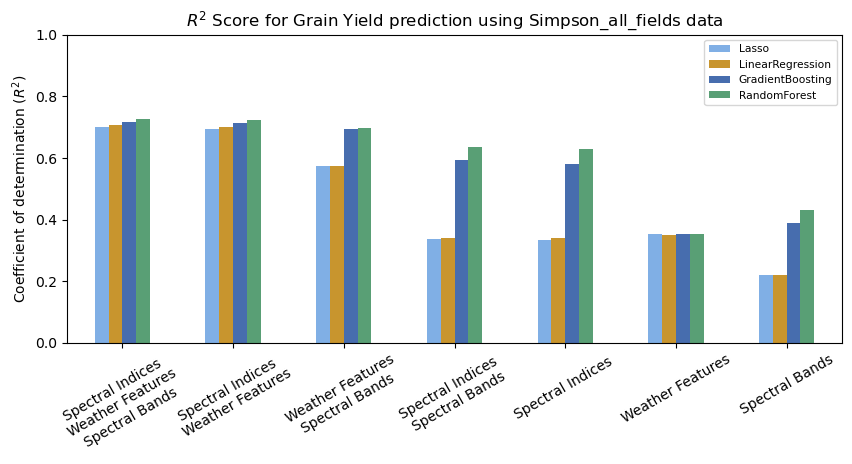

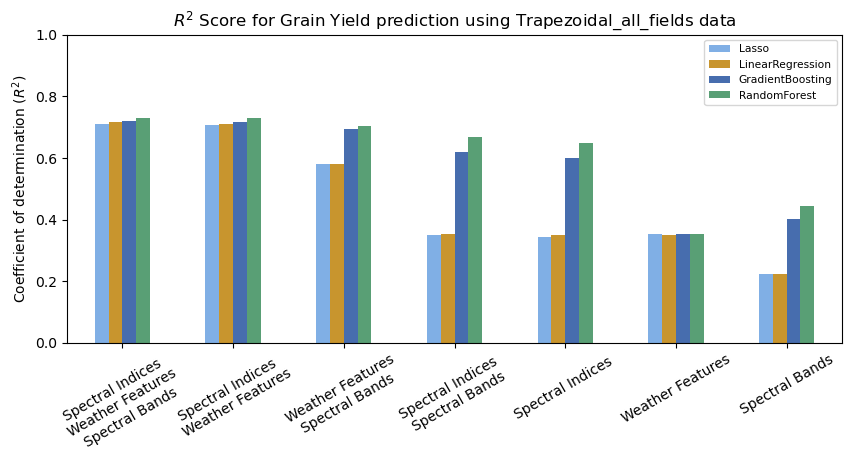

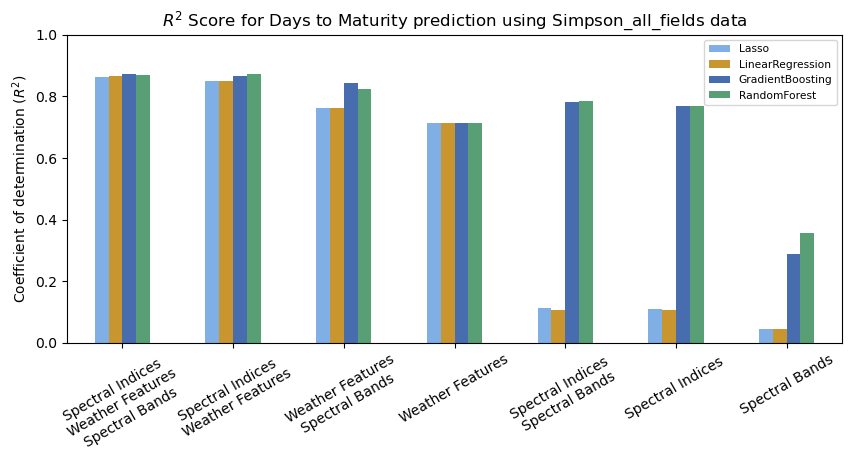

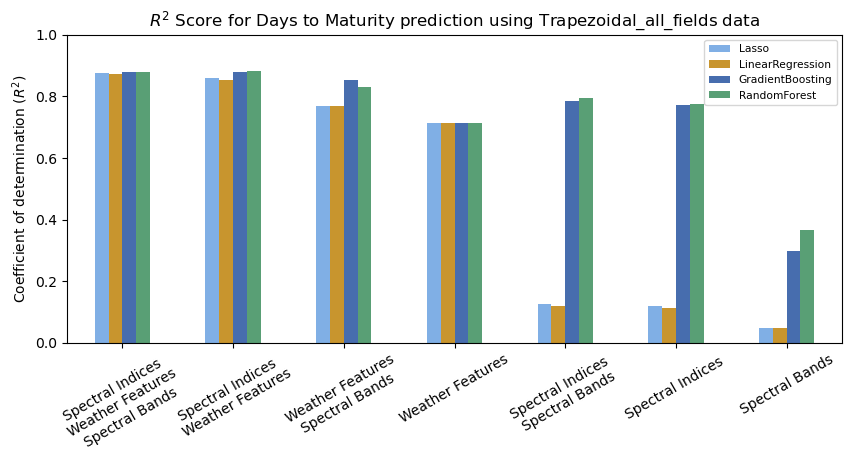

In [19]:
for target in ['_GY_', '_DM_']:
    for agg_method in ['Simps', 'Trapz']:
        if 'GY' in target:
            target_label = 'Grain Yield'
            current_df = plot_df_GY_
        elif 'DM' in target:
            target_label = 'Days to Maturity'
            current_df = plot_df_DM_
        if 'Simp' in agg_method:
            agg_text = 'Simpson_all_fields data'
        elif 'Trapz' in agg_method:
            agg_text = 'Trapezoidal_all_fields data'
        current_df = current_df[(current_df['Agg_method']==agg_text)]

        # ================================================================================================
        # ================================================================================================
        cols = [x for x in current_df.columns if x.split('#')[-1]== query if 'Lasso(random_state=1)' not in x]
        data_df = current_df[['Features']+cols].copy()

        # Sort rows based on average score in each row
        mean_score, idx = zip(*sorted(zip(data_df.mean(axis=1), [i for i in range(len(data_df))]), reverse=True))
        data_df = data_df.iloc[list(idx)].reset_index(drop=True)


        # Formatting x labels
        x_labels_temp = data_df.iloc[:,0].tolist()
        x_labels = []
        for item in [eval(x) for x in x_labels_temp]:
            new_item = [y.replace('_', ' ').title() for y in item]
            new_item = '\n'.join(new_item)
            new_item = new_item.replace('All', '')
            new_item = new_item.replace('Base Indices', 'Spectral Bands')
            x_labels.append(new_item)

        filename = 'plot_df'+'_'+query+'_'+target+agg_method
        

        plot_df = data_df[cols]
        plot_df.columns = [x.split('(')[0] for x in plot_df.columns]
        new_cols_seq = [plot_df.columns[1], plot_df.columns[2], plot_df.columns[0], plot_df.columns[3]]
        # plot_df['Lasso']
        plot_df = plot_df.loc[:,new_cols_seq]
        
        # ================================================================================================
        # ================================================================================================
        # Exporting dataset to csv
        data_df.Features = x_labels
        data_df.Features = x_labels
        data_df.columns = [[x.split('(')[0] for x in data_df.columns]]
        exp_cols_seq = [data_df.columns[0], data_df.columns[2], data_df.columns[3], data_df.columns[1], data_df.columns[4]]
        data_df = data_df.loc[:,exp_cols_seq]

        # ================================================================================================
        # ================================================================================================
        fig, ax = plt.subplots(figsize=(10,4))
        colors_1 = ['#D92424', '#CC71BC', '#6FC76B', '#64A1D2']
        colors_2 = ['#D92424', '#CC71BC', '#E39931', '#6FC76B']
        colors_3 = ['#80AFE5', '#C8952E', '#476DAE', '#599F75'] # Custom Color Blind Palette
        plot_df.plot.bar(ax=ax, stacked=False, rot=30, 
                         color=colors_3
                        )
        plt.xticks(ticks = np.arange(0, plot_df.shape[0], step=1), labels=x_labels)
        ax.set_ylim(bottom=0, top=1)
        ax.set_title(score+'for '+target_label+' prediction using '+agg_text)
        # Defining items, font, and location of legend labels
        # Only being done to customize the names. Otherwise it'll be printed in default settings
        ax.legend([x.replace('Regressor','') for x in plot_df.columns], prop={"size":7.7}, loc=1)

#         ax.set_xlabel(target_label)
        ax.set_ylabel('Coefficient of determination ($R^2$)')

        # Save datasets and plots
#         data_df.to_csv(plot_path+filename+'.csv', index=False)
#         plt.savefig(plot_path+filename+'.jpg', dpi=150, bbox_inches='tight')

        plt.show()
        # ================================================================================================
        # ================================================================================================

# END OF SECTION

### GY

In [13]:
target_label = 'Grain Yield'

In [20]:
data_df = Simps_all_mix_R2_test_GY.iloc[:,1:].copy()
x_labels = Simps_all_mix_R2_test_GY.iloc[:,0].tolist()
filename = 'Simps_all_mix_R2_test_GY'
method_name = 'Simpson\'s rule'

# data_df = Trapz_all_mix_R2_test_GY.iloc[:,1:].copy()
# x_labels = Trapz_all_mix_R2_test_GY.iloc[:,0].tolist()
# filename = 'Trapz_all_mix_R2_test_GY'
# method_name = 'composite trapezoidal rule'

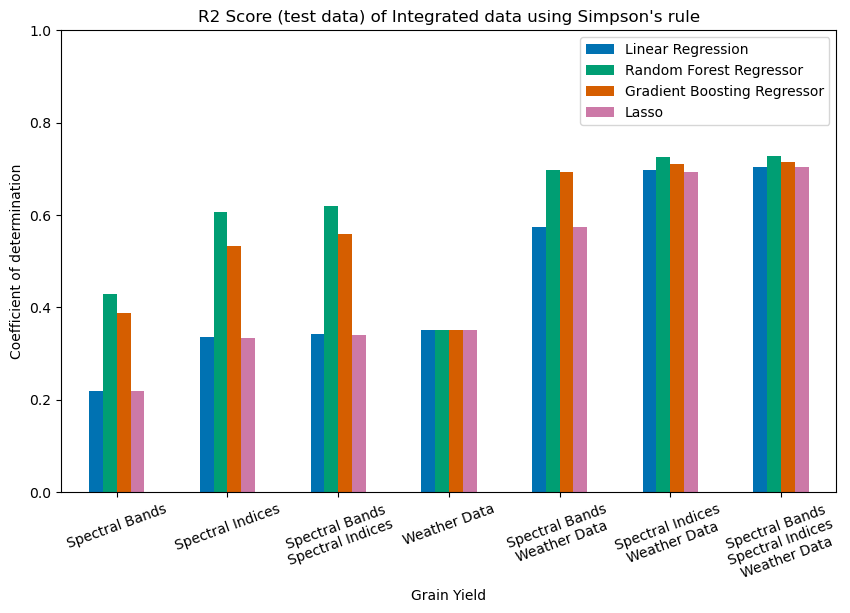

In [21]:
fig, ax = plt.subplots(figsize=(10,6))
data_df.plot.bar(ax=ax, stacked=False, rot=20)
plt.xticks(ticks = np.arange(0, data_df.shape[0], step=1), labels=x_labels)
ax.set_ylim(bottom=0, top=1)
ax.set_title(score+data_type+' of Integrated data using '+method_name)
ax.set_xlabel(target_label)
ax.set_ylabel('Coefficient of determination ($R^2$)')
# plt.savefig(plot_path+filename+'.jpg', dpi=150, bbox_inches='tight')

plt.show()

## Self 66-33 

### DM

In [60]:
target_label = 'Days to Maturity'

In [65]:
data_df_1 = Simps_66_33_R2_test_DM.copy()
fields = set(Simps_66_33_R2_test_DM.iloc[:,0].tolist())
filename = 'Simps_66_33_R2_test_DM'
method_name = 'Simpson\'s rule'

# data_df_1 = Trapz_66_33_R2_test_DM.copy()
# fields = set(Trapz_66_33_R2_test_DM.iloc[:,0].tolist())
# filename = 'Trapz_66_33_R2_test_DM'
# method_name = 'composite trapezoidal rule'

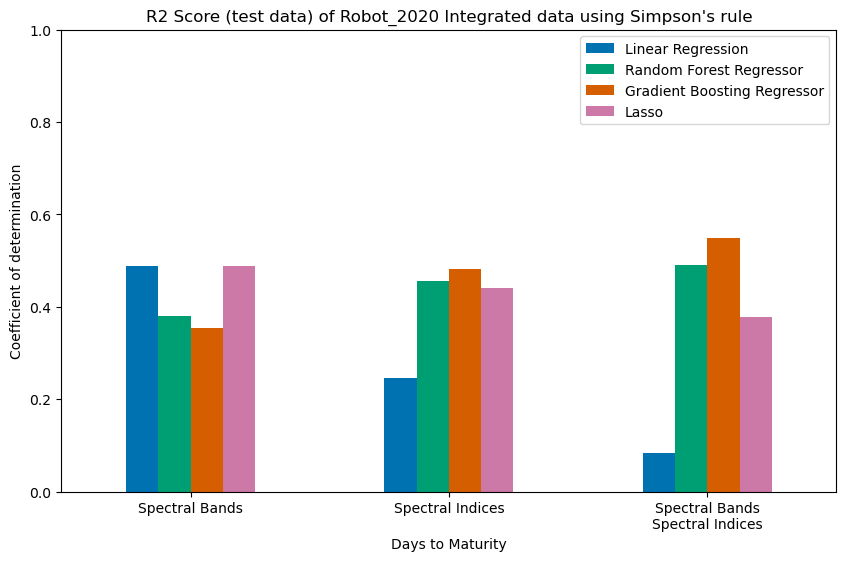

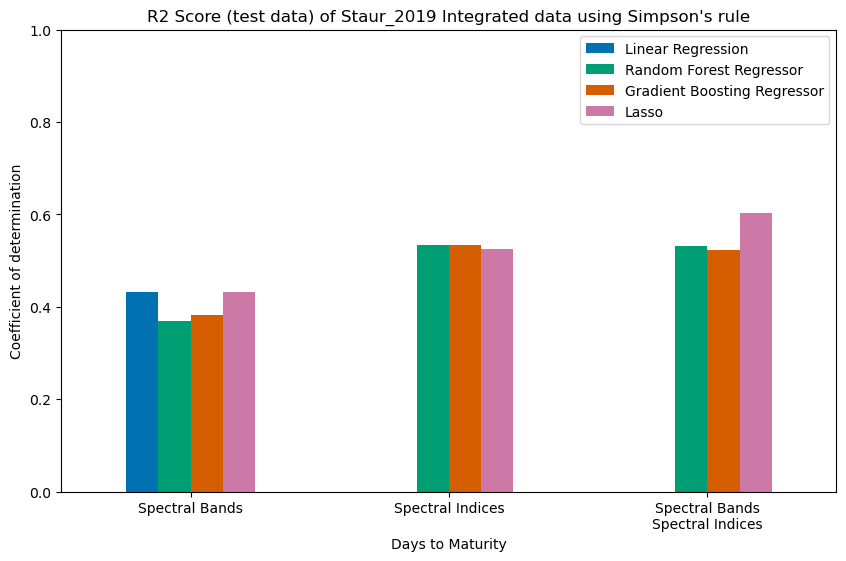

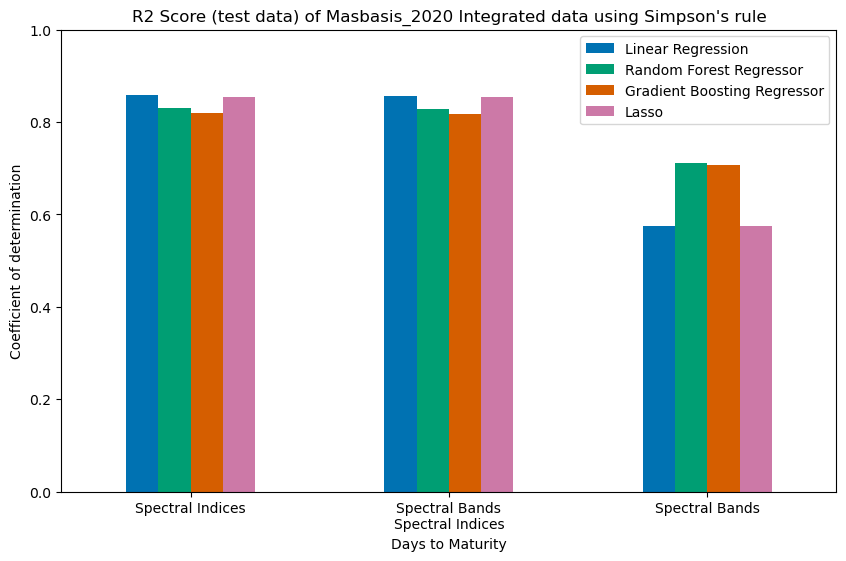

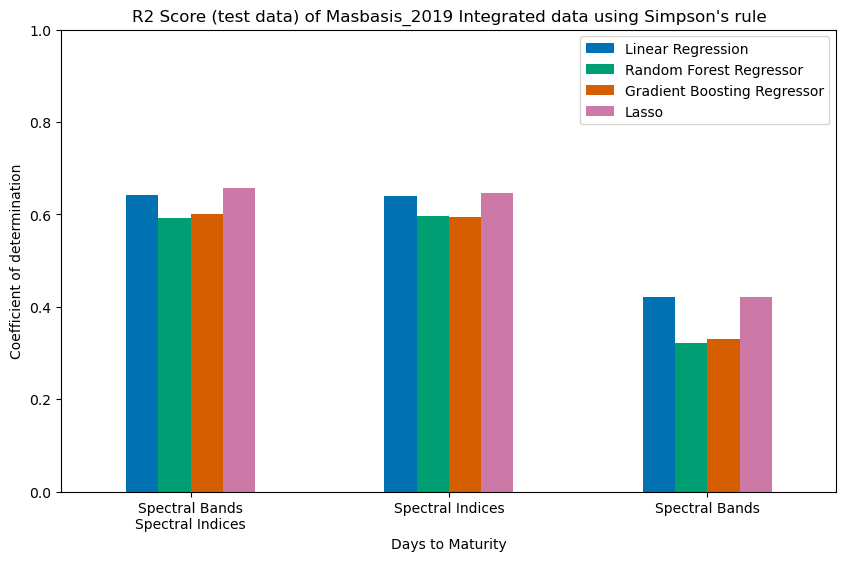

In [66]:
for field in fields:
    temp_df = data_df_1[data_df_1['Field'] == field]
    x_labels = temp_df.iloc[:,1].tolist()
    
    data_df = temp_df.drop(['Features', 'Field'], axis=1).copy()
    fig, ax = plt.subplots(figsize=(10,6))
    temp_df.plot.bar(ax=ax, stacked=False, rot=0)
    plt.xticks(ticks = np.arange(0, data_df.shape[0], step=1), labels=x_labels)
    ax.set_ylim(bottom=0, top=1)
    ax.set_title(score+data_type+' of '+field[:-6]+' Integrated data using '+method_name)
    ax.set_xlabel(target_label)
    ax.set_ylabel('Coefficient of determination ($R^2$)')
#     plt.savefig(plot_path+filename+'_'+field[:-6]+'.jpg', dpi=150, bbox_inches='tight')

    plt.show()

### GY

In [53]:
target_label = 'Grain Yield'

In [70]:

data_df_2 = Simps_66_33_R2_test_GY.copy()
fields = set(Simps_66_33_R2_test_GY.iloc[:,0].tolist())
filename = 'Simps_66_33_R2_test_GY'
method_name = 'Simpson\'s rule'

data_df_2 = Trapz_66_33_R2_test_GY.copy()
fields = set(Trapz_66_33_R2_test_GY.iloc[:,0].tolist())
filename = 'Trapz_66_33_R2_test_GY'
method_name = 'composite trapezoidal rule'

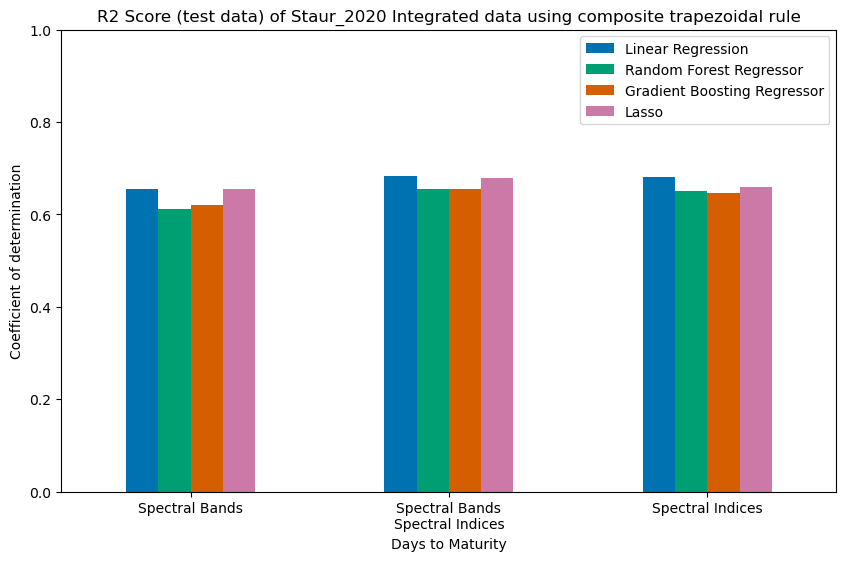

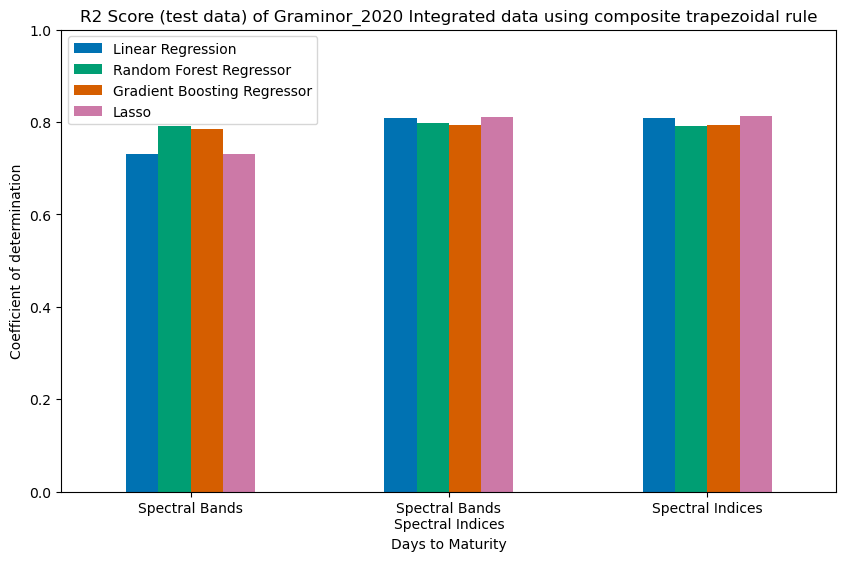

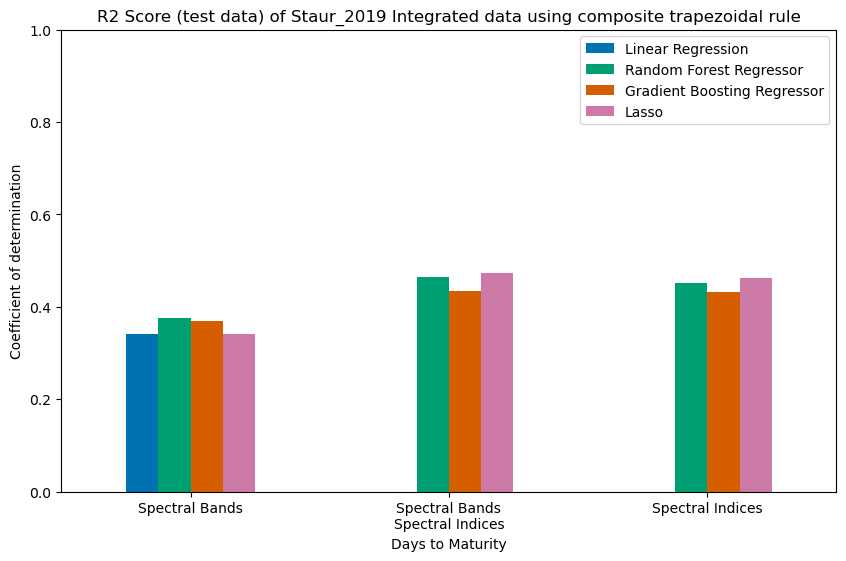

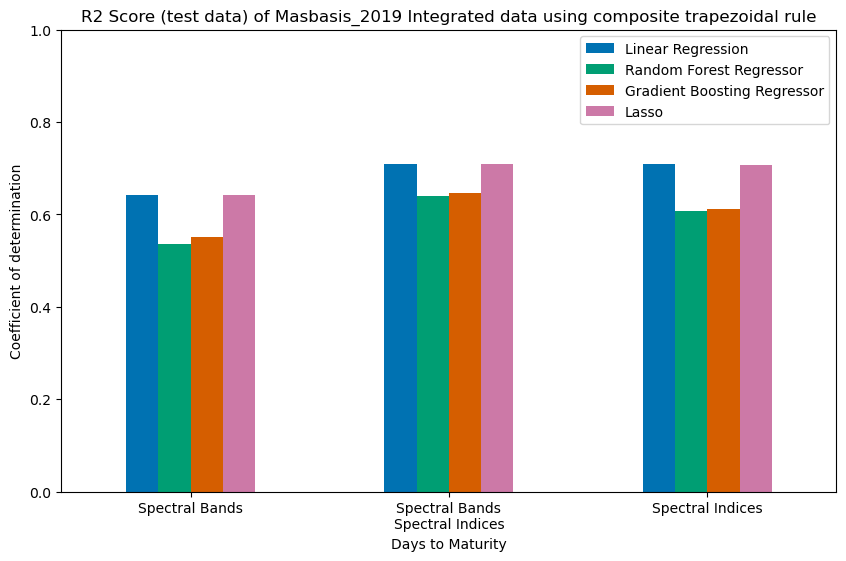

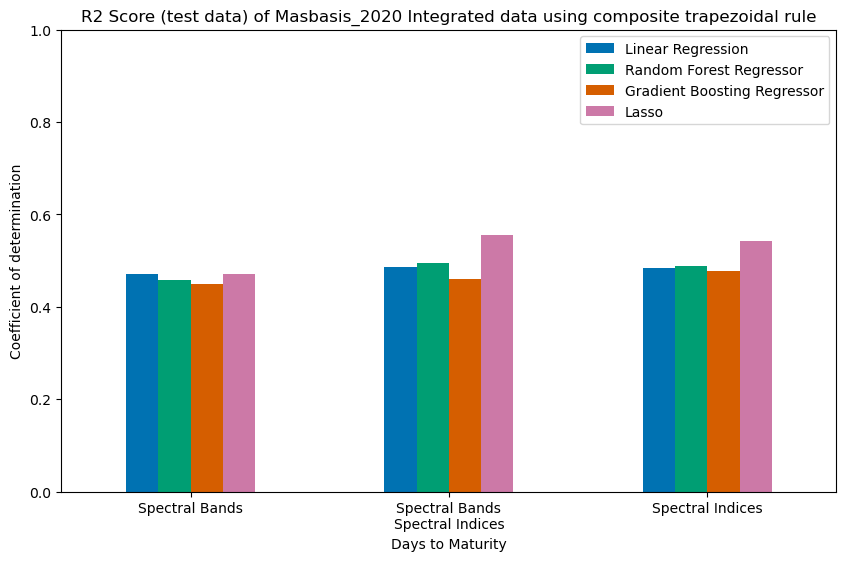

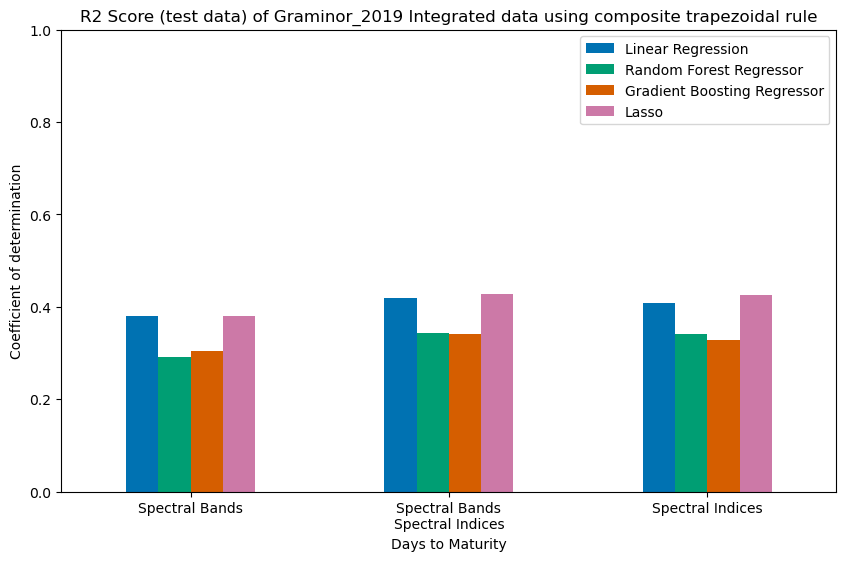

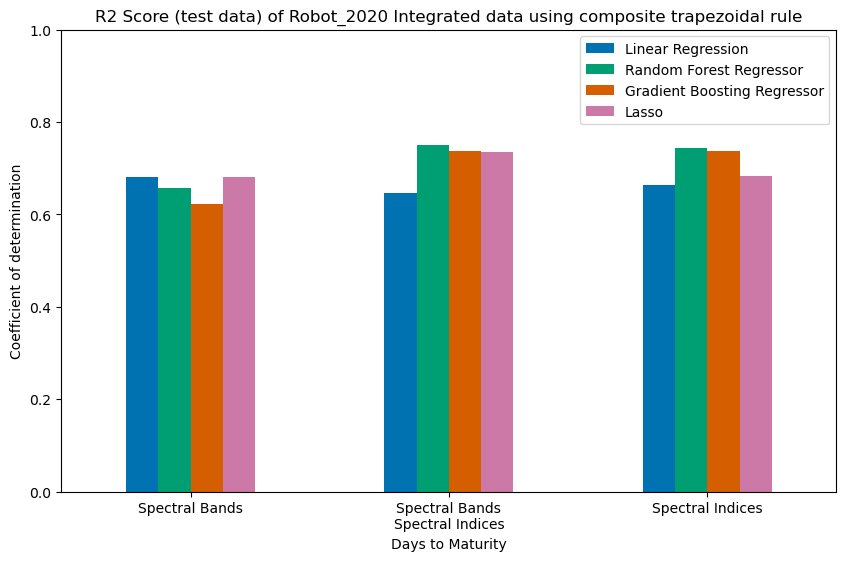

In [71]:
for field in fields:
    temp_df = data_df_2[data_df_2['Field'] == field]
    x_labels = temp_df.iloc[:,1].tolist()
    
    data_df = temp_df.drop(['Features', 'Field'], axis=1).copy()
    fig, ax = plt.subplots(figsize=(10,6))
    temp_df.plot.bar(ax=ax, stacked=False, rot=0)
    plt.xticks(ticks = np.arange(0, data_df.shape[0], step=1), labels=x_labels)
    ax.set_ylim(bottom=0, top=1)
    ax.set_title(score+data_type+' of '+field[:-6]+' Integrated data using '+method_name)
    ax.set_xlabel(target_label)
    ax.set_ylabel('Coefficient of determination ($R^2$)')
#     plt.savefig(plot_path+filename+'_'+field[:-6]+'.jpg', dpi=150, bbox_inches='tight')

    plt.show()

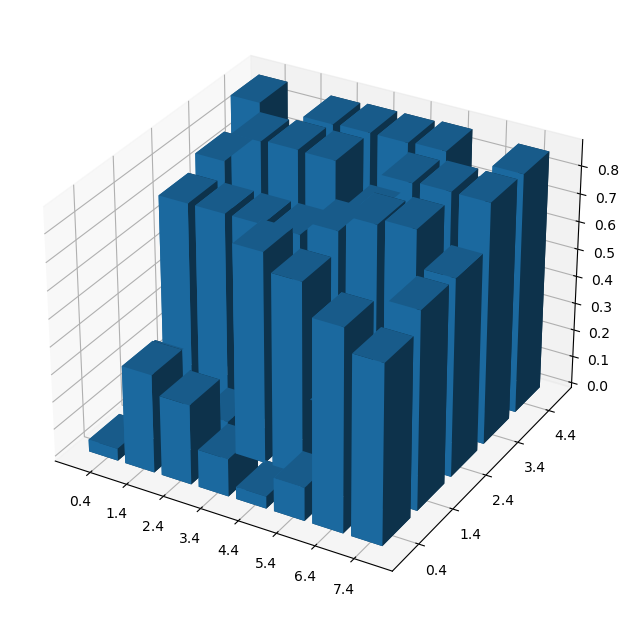

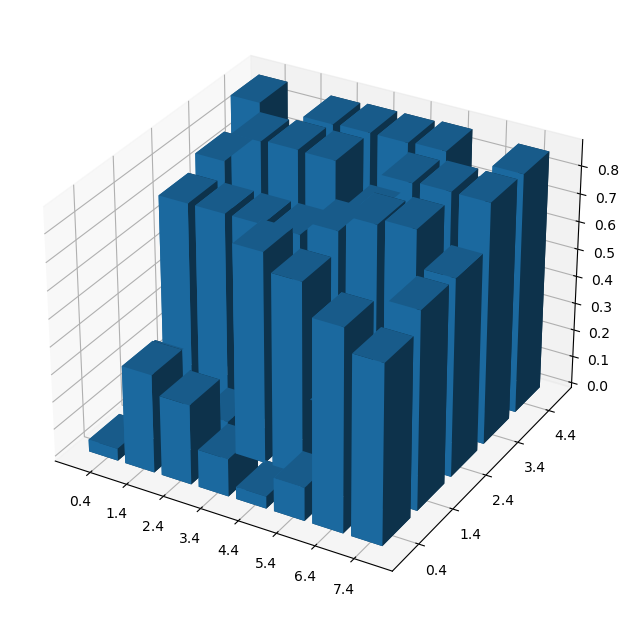

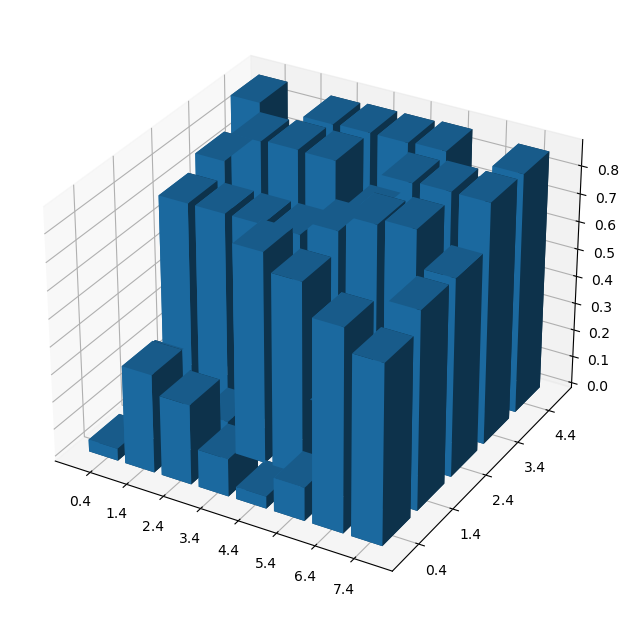

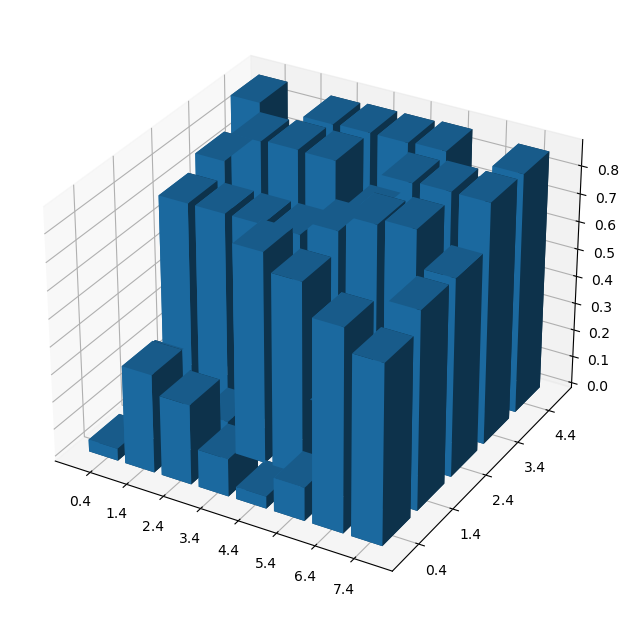

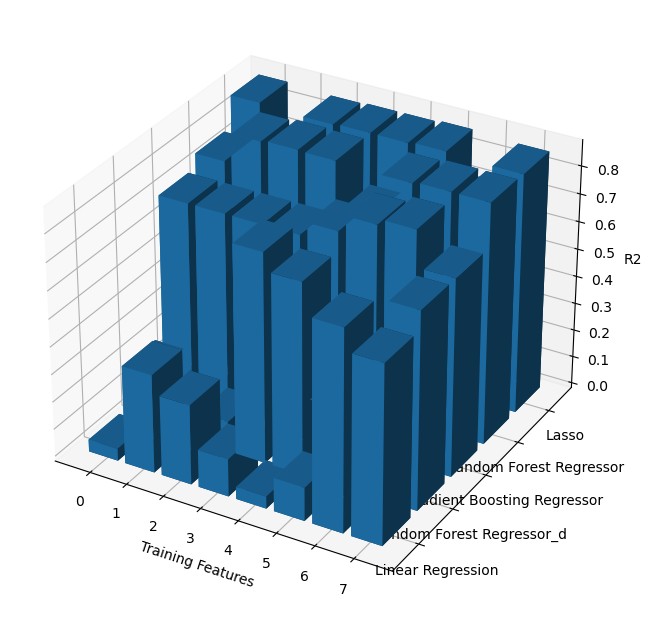

In [68]:
from mpl_toolkits.mplot3d import Axes3D

data_df = Simps_R2_test.iloc[:,1:].copy()
# thickness of the bars
dx, dy = .8, .8

# prepare 3d axes
fig = plt.figure(figsize=(10,6))
ax = Axes3D(fig)

# set up positions for the bars 
xpos=np.arange(data_df.shape[0])
ypos=np.arange(data_df.shape[1])

# set the ticks in the middle of the bars
ax.set_xticks(xpos + dx/2)
ax.set_yticks(ypos + dy/2)

# create meshgrid 
# print xpos before and after this block if not clear
xpos, ypos = np.meshgrid(xpos, ypos)
xpos = xpos.flatten()
ypos = ypos.flatten()

# the bars starts from 0 attitude
zpos=np.zeros(data_df.shape).flatten()

# the bars' heights
dz = data_df.values.ravel()

# plot 
ax.bar3d(xpos,ypos,zpos,dx,dy,dz)

# put the column / index labels
ax.w_yaxis.set_ticklabels(data_df.columns)
ax.w_xaxis.set_ticklabels(data_df.index)

# name the axes
ax.set_xlabel('Training Features')
# ax.set_ylabel('Models')
ax.set_zlabel('R2')

plt.show()

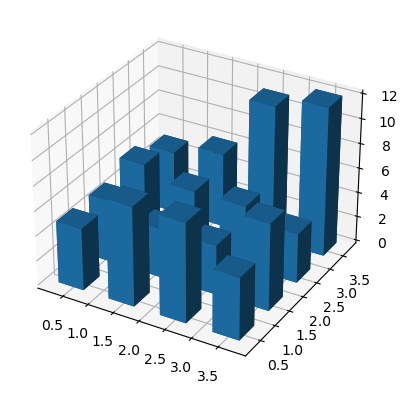

In [84]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


fig = plt.figure()
ax = fig.add_subplot(projection='3d')
x, y = np.random.rand(2, 100) * 4
hist, xedges, yedges = np.histogram2d(x, y, bins=4, range=[[0, 4], [0, 4]])

# Construct arrays for the anchor positions of the 16 bars.
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the 16 bars.
dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

plt.show()

In [85]:
y

array([3.1369191 , 1.58819015, 0.61858733, 2.88477299, 3.34732362,
       3.75142081, 2.30685528, 0.78010624, 0.47117588, 3.80240082,
       1.13468921, 3.82624969, 3.63770185, 1.31370075, 3.80706227,
       0.4652859 , 3.4972566 , 3.94090187, 3.00134152, 3.94062586,
       3.96072094, 0.24390837, 0.01494392, 3.25001285, 2.33094688,
       0.60098393, 0.60869423, 2.10823801, 1.91762079, 0.36875975,
       2.04782973, 0.17132442, 3.22518462, 0.96879466, 3.39284439,
       2.78235943, 1.44530746, 2.02280576, 1.17668969, 2.64033828,
       2.13654141, 0.77926424, 3.44762272, 3.91211558, 3.5287465 ,
       2.10943668, 0.88563616, 0.81088986, 0.30222999, 3.81027195,
       3.51667163, 3.59769305, 0.26198273, 1.39670786, 1.93515312,
       3.02811047, 0.22710621, 0.91604907, 2.51708129, 1.15530884,
       3.98086084, 1.67240682, 3.94040032, 3.04979149, 0.22209944,
       1.27081141, 3.87104853, 0.239195  , 0.03206925, 2.33695948,
       2.60213666, 3.24638583, 1.73975863, 2.82964713, 2.33831

In [86]:
hist

array([[ 5.,  5.,  6.,  5.],
       [ 8.,  4.,  5.,  6.],
       [ 8.,  4.,  5., 11.],
       [ 5.,  7.,  4., 12.]])

## Selected fetures results

In [6]:
# feature_imp_results = pd.read_excel('SFS Feature Selection_ALL.xlsx', engine='openpyxl')
feature_imp_results = pd.read_excel('ADOR_GrainYield_Simpsons.xlsx', engine='openpyxl')

# feature_imp_results

In [7]:
temp_df = feature_imp_results[(feature_imp_results['Model'] == 'GradientBoosting') &
                              (feature_imp_results['Feature_Selection'] == 'SBS') &
                              (feature_imp_results['Target_Variable'] == 'GrainYield')]
gb_sbs_gy_results = temp_df[['Features', 'avg_score']].reset_index(drop=True)
gb_sbs_gy_results.set_index('Features', inplace=True)

temp_df = feature_imp_results[(feature_imp_results['Model'] == 'GradientBoosting') &
                              (feature_imp_results['Feature_Selection'] == 'SFS') &
                              (feature_imp_results['Target_Variable'] == 'GrainYield')]
gb_sfs_gy_results = temp_df[['Features', 'avg_score']].reset_index(drop=True)
gb_sfs_gy_results.set_index('Features', inplace=True)

temp_df = feature_imp_results[(feature_imp_results['Model'] == 'LinearRegression') &
                              (feature_imp_results['Feature_Selection'] == 'SBS') &
                              (feature_imp_results['Target_Variable'] == 'GrainYield')]
lr_sbs_gy_results = temp_df[['Features', 'avg_score']].reset_index(drop=True)
lr_sbs_gy_results.set_index('Features', inplace=True)

temp_df = feature_imp_results[(feature_imp_results['Model'] == 'LinearRegression') &
                              (feature_imp_results['Feature_Selection'] == 'SFS') &
                              (feature_imp_results['Target_Variable'] == 'GrainYield')]
lr_sfs_gy_results = temp_df[['Features', 'avg_score']].reset_index(drop=True)
lr_sfs_gy_results.set_index('Features', inplace=True)


In [8]:
temp_df = feature_imp_results[(feature_imp_results['Model'] == 'GradientBoosting') &
                              (feature_imp_results['Feature_Selection'] == 'SBS') &
                              (feature_imp_results['Target_Variable'] == 'Days2Maturity')]
gb_sbs_dm_results = temp_df[['Features', 'avg_score']].reset_index(drop=True)
gb_sbs_dm_results.set_index('Features', inplace=True)

temp_df = feature_imp_results[(feature_imp_results['Model'] == 'GradientBoosting') &
                              (feature_imp_results['Feature_Selection'] == 'SFS') &
                              (feature_imp_results['Target_Variable'] == 'Days2Maturity')]
gb_sfs_dm_results = temp_df[['Features', 'avg_score']].reset_index(drop=True)
gb_sfs_dm_results.set_index('Features', inplace=True)

temp_df = feature_imp_results[(feature_imp_results['Model'] == 'LinearRegression') &
                              (feature_imp_results['Feature_Selection'] == 'SBS') &
                              (feature_imp_results['Target_Variable'] == 'Days2Maturity')]
lr_sbs_dm_results = temp_df[['Features', 'avg_score']].reset_index(drop=True)
lr_sbs_dm_results.set_index('Features', inplace=True)

temp_df = feature_imp_results[(feature_imp_results['Model'] == 'LinearRegression') &
                              (feature_imp_results['Feature_Selection'] == 'SFS') &
                              (feature_imp_results['Target_Variable'] == 'Days2Maturity')]
lr_sfs_dm_results = temp_df[['Features', 'avg_score']].reset_index(drop=True)
lr_sfs_dm_results.set_index('Features', inplace=True)

gb_sbs_dm_results
lr_sbs_dm_results

gb_sfs_dm_results
lr_sfs_dm_results

gb_sbs_gy_results
lr_sbs_gy_results

gb_sfs_gy_results
lr_sfs_gy_results

,avg_score
Features,
1,0.294189
2,0.581666
3,0.636148
4,0.649527
5,0.667979
...,...
111,0.714858
112,0.714858
113,0.714858


### Plot SFS and SBS Separately

In [9]:
def annot_max(x,y, ax=None):
    xmax = x[np.argmax(y)]
    ymax = y.max()
    text= "x={:.3f}, y={:.3f}".format(xmax, ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.94,0.96), **kw)

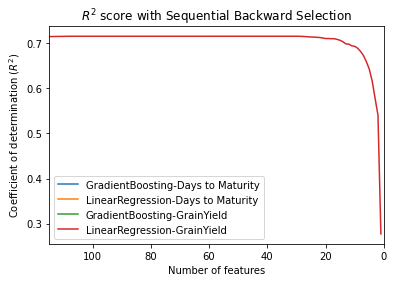

In [10]:

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(gb_sbs_dm_results, label='GradientBoosting-Days to Maturity')
# annot_max(gb_sbs_dm_results.index.tolist(),gb_sbs_dm_results.values)
ax.plot(lr_sbs_dm_results, label='LinearRegression-Days to Maturity')
ax.plot(gb_sbs_gy_results, label='GradientBoosting-GrainYield')
ax.plot(lr_sbs_gy_results, label='LinearRegression-GrainYield')
ax.legend()

# ax.set_ylim(top= 1)
ax.set_xlim(max(gb_sfs_gy_results.index), 0)
ax.set_title('$R^2$ score with Sequential Backward Selection')
ax.set_xlabel('Number of features')
ax.set_ylabel('Coefficient of determination ($R^2$)')
# plt.savefig('R2 SBS.jpg', dpi=150, bbox_inches='tight')

plt.show()

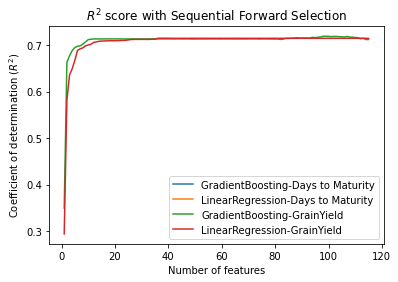

In [11]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(gb_sfs_dm_results, label='GradientBoosting-Days to Maturity')
ax.plot(lr_sfs_dm_results, label='LinearRegression-Days to Maturity')
ax.plot(gb_sfs_gy_results, label='GradientBoosting-GrainYield')
ax.plot(lr_sfs_gy_results, label='LinearRegression-GrainYield')
ax.legend()

ax.set_title('$R^2$ score with Sequential Forward Selection')
ax.set_xlabel('Number of features')
ax.set_ylabel('Coefficient of determination ($R^2$)')
# plt.savefig('R2 SFS.jpg', dpi=150, bbox_inches='tight')

plt.show()

### Plot Target features separately

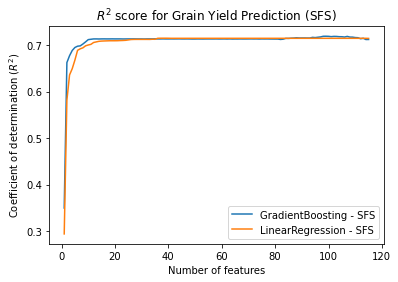

In [12]:

fig, ax = plt.subplots(figsize=(6,4))

ax.plot(gb_sfs_gy_results, label='GradientBoosting - SFS')
ax.plot(lr_sfs_gy_results, label='LinearRegression - SFS')
ax.legend()

# ax.set_ylim(top= 1)
ax.set_title('$R^2$ score for Grain Yield Prediction (SFS)')
ax.set_xlabel('Number of features')
ax.set_ylabel('Coefficient of determination ($R^2$)')
plt.savefig('R2 SFS GY.jpg', dpi=150, bbox_inches='tight')

plt.show()

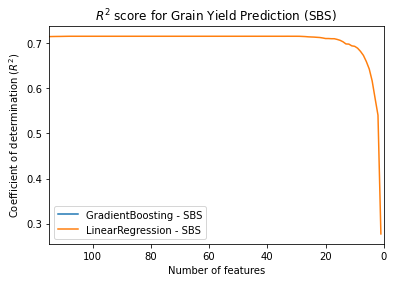

In [13]:

fig, ax = plt.subplots(figsize=(6,4))

ax.plot(gb_sbs_gy_results, label='GradientBoosting - SBS')
ax.plot(lr_sbs_gy_results, label='LinearRegression - SBS')
ax.legend()

ax.set_xlim(max(gb_sfs_gy_results.index), 0)
ax.set_title('$R^2$ score for Grain Yield Prediction (SBS)')
ax.set_xlabel('Number of features')
ax.set_ylabel('Coefficient of determination ($R^2$)')
plt.savefig('R2 SBS GY.jpg', dpi=150, bbox_inches='tight')

plt.show()

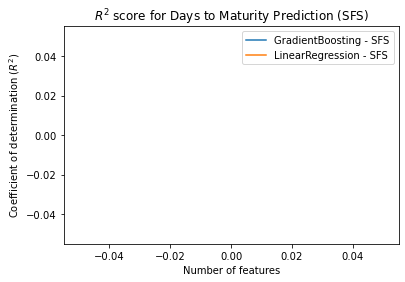

In [14]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(gb_sfs_dm_results, label='GradientBoosting - SFS')
ax.plot(lr_sfs_dm_results, label='LinearRegression - SFS')
ax.legend()

ax.set_title('$R^2$ score for Days to Maturity Prediction (SFS)')
ax.set_xlabel('Number of features')
ax.set_ylabel('Coefficient of determination ($R^2$)')
plt.savefig('R2 SFS DM.jpg', dpi=150, bbox_inches='tight')
plt.show()

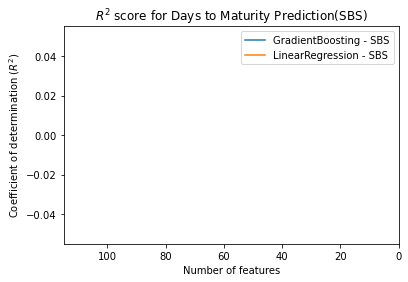

In [15]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(gb_sbs_dm_results, label='GradientBoosting - SBS')
ax.plot(lr_sbs_dm_results, label='LinearRegression - SBS')
ax.legend()

ax.set_xlim(max(gb_sfs_gy_results.index), 0)
ax.set_title('$R^2$ score for Days to Maturity Prediction(SBS)')
ax.set_xlabel('Number of features')
ax.set_ylabel('Coefficient of determination ($R^2$)')
plt.savefig('R2 SBS DM.jpg', dpi=150, bbox_inches='tight')

plt.show()